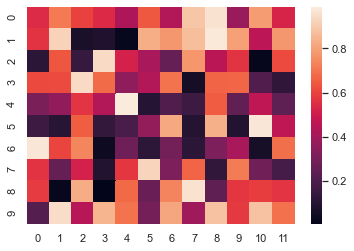

In [8]:
# Trying out Seaborn

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

Heatmap Tutorial Notes

TowardsDataScience: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c
Something on interpolating: https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set/59920744#59920744

Goal: For each time step, create heatmap where x=width, y=length of the room, and color is the sensor reading.



ICU Room 1

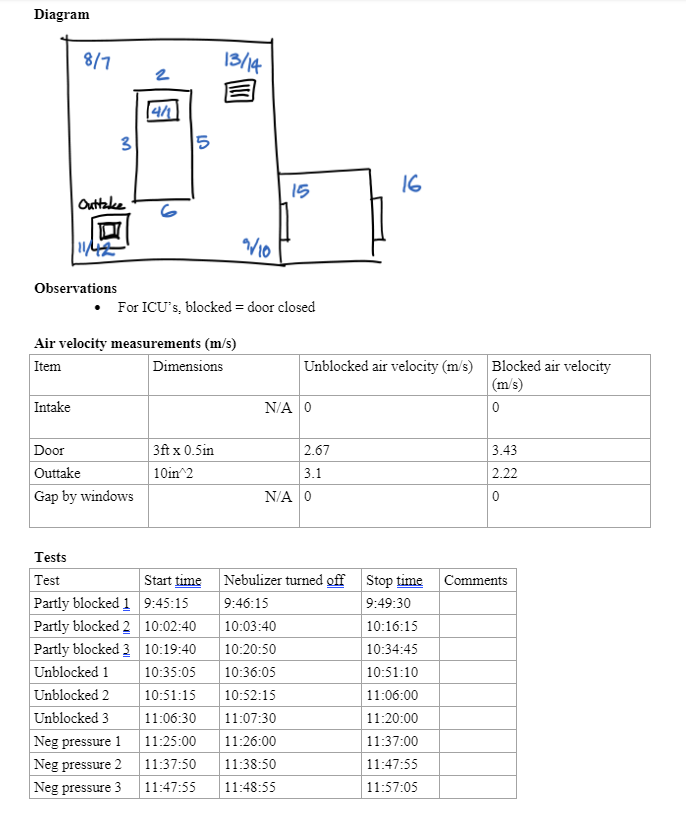

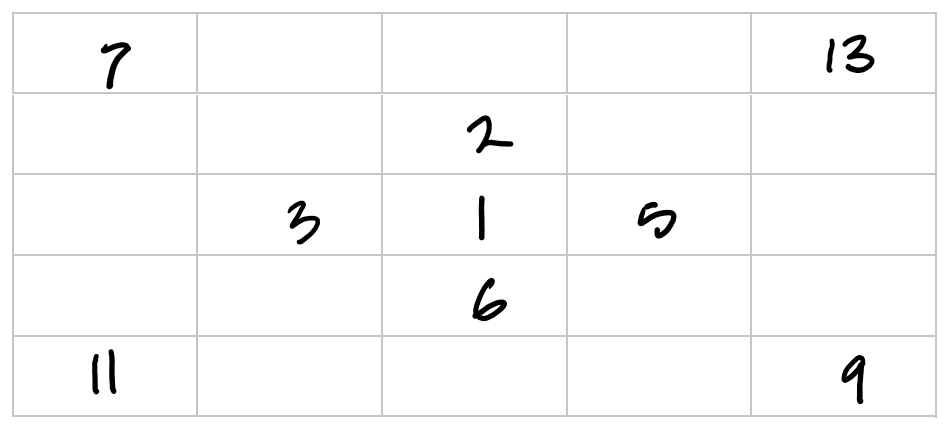


OR 12



In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy import interpolate
import math
import glob
import os
from PIL import Image
from PIL import ImageChops

In [14]:
# USER INPUT - should be automated


# Read in data
#filepaths = glob.glob("./averagedData/*.csv")
filepaths = glob.glob("./averagedData/OR 12 Unblocked.csv")

# Define sensor placement
num_sensors = 9
num_outside_sensors = 3
# ICU 1
# sensor_names = ['S-01','S-02', 'S-03', 'S-05', 'S-06','S-13', 'S-09', 'S-11', 'S-15']
# sensor_columns = [0, 1, 2, 4, 5, 12, 8, 10, 14]

# OR 12
sensor_names = ['S-01','S-02', 'S-03', 'S-05', 'S-06','S-13', 'S-09', 'S-11', 'S-15']
sensor_columns = [0, 1, 2, 4, 5, 12, 8, 10, 14]
sensor_locations = [[2, 2, 1, 3, 2, 0, 4, 4, 0], [2, 1, 2, 2, 3, 0, 4, 0, 4]]
outside_sensor_columns = [14, 17, 18]
outside_sensor_locations = [[0,1],[0,0],[0,2]]

for idx,x in enumerate(filepaths):
    df = pd.read_csv(x).dropna(how='all')
    # Make a matrix for each room's data
    matrix = df.to_numpy()
    # Iterate through data by row
    rows = matrix.shape[0]
    for x in np.array(range(1,26)):
        row = matrix[x, :]
        sensor_data = np.zeros(9)
        # There is a better way to do this
        for j in range(9):
            sensor_data[j] = row[sensor_columns[j]]
        # Build room
        points = sensor_locations
        points = np.transpose(points)
        values = [math.log(a) for a in sensor_data]
        #print(points)
        #print(values)
        n = np.linspace(0,4,5)
        grid_x, grid_y = np.meshgrid(n,n)
        grid_z0 = interpolate.griddata(points, values, (grid_x, grid_y), method='linear')
        fig = plt.figure()
        #print('time = ' + str(x) + " min")
        color = sns.color_palette('RdYlGn_r', 5, as_cmap=True)
        #sns.cubehelix_palette(start=2, rot=0, as_cmap=True)
        #sns.diverging_palette(145, 300, s=60, as_cmap=True)
        #sns.color_palette("rocket", as_cmap=True)
        ax1 = sns.heatmap(grid_z0, vmin=0, vmax=10, square=True, alpha=1, cmap=color, xticklabels=False, yticklabels=False, cbar_kws={'label': "Measured Particles (Log Scale)"})  
        plt.savefig("imgFolder/test" + str(x) + ".jpg", format="JPEG")
        plt.close('all')
        
        outside_sensor_data = np.zeros(num_outside_sensors)
        for k in range(num_outside_sensors):
            outside_sensor_data[k] = row[sensor_columns[k]]
        outside_points = np.transpose(outside_sensor_locations)
        outside_values = [math.log(a) for a in outside_sensor_data]
        outside_df = pd.DataFrame(outside_values)
        print(outside_df)
        fig = plt.figure()
        ax2 = sns.heatmap(outside_df, vmin=0, vmax=10, square=True, cmap=color, xticklabels=False, yticklabels=False, cbar=True)
        plt.savefig("imgFolder/hall" + str(x) + ".jpg", format="JPEG")
        plt.close('all')
        # Overlay schematic
        # route = './Graphs, Images, and Animations/ICU1.png'
        # img = mpimg.imread(route)
        # plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
        
        """
        img = Image.open(route)
        fig_RGB = fig2img(fig).convert('RGB')
        #out = Image.blend(fig_RGB.convert('L'),img.convert('L'), 0.5)
        #x, y = fig_RGB.size
        out = fig_RGB.paste(img)
        #out = img.paste(fig_RGB)
 
        out.save("test_overlay.jpg", "JPEG")
        """

          0
0  4.532599
1  4.477337
2  4.543295
          0
0  4.442651
1  4.290459
2  4.836282
          0
0  9.703328
1  4.077537
2  4.700480
          0
0  9.506635
1  9.121509
2  4.787492
          0
0  9.207937
1  8.954544
2  4.753590
           0
0  10.486234
1   8.827615
2   4.574711
           0
0  10.241839
1   9.470626
2   4.499810
          0
0  9.865976
1  8.311398
2  4.356709
           0
0  10.427299
1   7.082549
2   4.762174
          0
0  9.877503
1  6.300786
2  5.398163
          0
0  8.617762
1  5.877736
2  5.638355
          0
0  6.746412
1  5.693732
2  5.837730
          0
0  6.098074
1  5.609472
2  6.113682
          0
0  5.655992
1  5.823046
2  6.161207
          0
0  5.594711
1  5.857933
2  6.322565
          0
0  6.016157
1  5.451038
2  6.359574
          0
0  5.720312
1  5.129899
2  6.220590
          0
0  5.726848
1  5.509388
2  5.948035
          0
0  5.476464
1  5.424950
2  5.768321
          0
0  5.187386
1  5.318120
2  5.556828
          0
0  5.093750
1  5

In [13]:
outside_df

,0
0,5.318120
1,4.882802
2,5.153292


In [4]:
from PIL import Image, ImageDraw
im = Image.new("RGB", (500, 250))
draw = ImageDraw.Draw(im)

#draw.rectangle([(0,0), (100, 100)])

#draw.ellipse((100, 100, 150, 200), fill=(255, 0, 0), outline=(0, 0, 0))
draw.rectangle((0, 0, 250, 250), fill=(0, 192, 192), outline=(255, 255, 255))
draw.rectangle((250, 0, 500, 250), fill=(0, 192, 192), outline=(255, 255, 255))
#draw.line((350, 200, 450, 100), fill=(255, 255, 0), width=10)

im.save('pillow_imagedraw.jpg', quality=95)

In [5]:
print(type(outside_sensor_data))

<class 'numpy.ndarray'>


In [6]:
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = Image.open(buf)
    return img

2. Reduce opacity and plot on image on the floor plan

Do this after making the figure

    img = mpimg.imread(route)

    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    
Then this boi

    route = './Graphs, Images, and Animations/ICU1.png'

    img = mpimg.imread(route)

    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)

In [7]:
import imageio
# os.chdir(r"C:\Users\selin\Google Drive\1 Academics\Extracurriculars\Research - AeroSpec\UWMed4-20-main\UWMed4-20-main\images")
image_list = []
for i in range(1,26):
    image_list.append(imageio.imread("test" + str(i) + ".jpg"))
print(len(image_list))
kargs = { 'duration': .3 }
imageio.mimwrite('heatmap_gif_red_green.gif', image_list, **kargs)

25


Python
- Add OR 12
- Make code for a separate mini-heatmap for corridor sensors ***Selina
- 

Post-processing (Word)
- Need OR 12 and ICU 1
- Select images and add timestamps (4 timestamps per run)
- Make the schematics and overlay them
